In [1]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from adjustText import adjust_text
from datasets import load_dataset

# Load the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

df['job_posted_date']= pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


df_DA_US = df[(df['job_title_short']=='Data Analyst')& (df['job_country']=='United States')].copy()

df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])


In [6]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg','job_skills']]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [19]:
df_DA_US_groupby=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])


df_DA_US_top = df_DA_US_groupby.sort_values(by='median', ascending = False).head(10)

df_DA_US_topskills = df_DA_US_groupby.sort_values(by='count', ascending = False).head(10).sort_values(by='median', ascending = False)

In [20]:
df_DA_US_topskills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


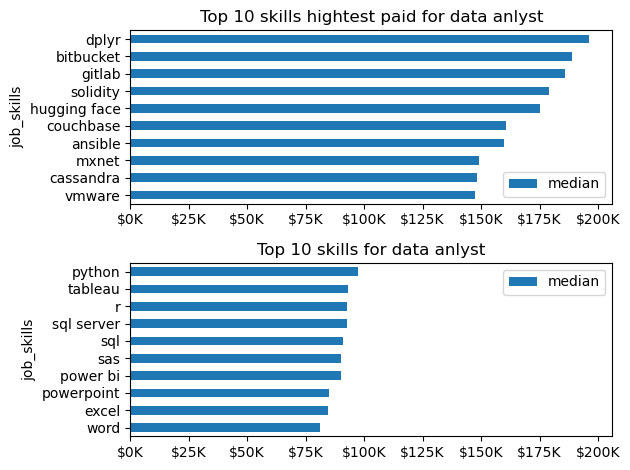

In [37]:
fig, ax = plt.subplots(2,1)

df_DA_US_top.plot(kind = 'barh', y='median', ax=ax[0])
ax[0].invert_yaxis()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


df_DA_US_topskills[::-1].plot(kind= 'barh', y='median', ax=ax[1])
#ax[1].invert_yaxis()
#ax= ax.gca()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())
ax[0].set_title('Top 10 skills hightest paid for data anlyst')
ax[1].set_title('Top 10 skills for data anlyst')

plt.tight_layout()
#plt.xlim(0, 200000)